In [2]:
import pandas as pd

nuevo = pd.read_csv('/content/CommentDataset_cleaned_v2.csv')
aparts = pd.read_csv('/content/DatasetAirbnb_Cleaned_v1 (1).csv')

In [3]:
nuevo.columns

Index(['Unnamed: 0', 'name', 'imagen', 'user_id', 'comentario', 'apart_id',
       'ubicacion', 'gender', 'rating'],
      dtype='object')

In [4]:
aparts.columns

Index(['ID', 'Titulo', 'Descripcion Simple', 'Evaluaciones', 'Tipo', 'Precio',
       'URL', 'Limpieza', 'Veracidad', 'Llegada', 'Comunicacion', 'Ubicacion',
       'Calidad', 'Localizacion', 'Capacidad', 'Camas', 'Baños', 'Dormitorios',
       'Baño Compartido', 'Wifi', 'Mascotas', 'Piscina', 'Parking'],
      dtype='object')

In [5]:
df_1 = nuevo[['user_id','apart_id', 'ubicacion', 'gender', 'rating']]
df_2 = aparts[['Evaluaciones', 'URL', 'Limpieza', 'Veracidad', 'Llegada', 'Comunicacion', 'Ubicacion',
       'Calidad', 'Capacidad', 'Precio']]

In [6]:
df_1.head()

,user_id,apart_id,ubicacion,gender,rating
0,-1944082346885724092,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 8 años en Airbnb,male,5
1,-875489624484136257,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 8 años en Airbnb,male,5
2,7379949921758826728,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 9 años en Airbnb,female,4
3,-840522798083645344,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 7 años en Airbnb,male,5
4,-968160101397633662,https://www.airbnb.es/rooms/37584336?adults=1&...,"Phoenix, Arizona",male,5


In [7]:
df_2.head()

,Evaluaciones,URL,Limpieza,Veracidad,Llegada,Comunicacion,Ubicacion,Calidad,Capacidad,Precio
0,59.0,https://www.airbnb.es/rooms/31709557?adults=1&...,4.9,4.9,5.0,4.8,4.9,4.8,6.0,78.0
1,8.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.9,4.5,4.5,4.8,4.8,4.8,6.0,83.0
2,20.0,https://www.airbnb.es/rooms/46527977?adults=1&...,3.5,4.6,4.7,4.8,5.0,4.3,4.0,70.0
3,557.0,https://www.airbnb.es/rooms/721277134871448378...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,128.0
4,64.0,https://www.airbnb.es/rooms/50155790?adults=1&...,4.9,4.9,4.9,4.9,4.7,4.7,6.0,85.0


In [8]:
print(df_1.shape)
print(df_2.shape)

(15275, 5)
(788, 10)


In [9]:
df = pd.merge(df_1, df_2, left_on='apart_id', right_on='URL', how='left')

In [10]:
df.head()

,user_id,apart_id,ubicacion,gender,rating,Evaluaciones,URL,Limpieza,Veracidad,Llegada,Comunicacion,Ubicacion,Calidad,Capacidad,Precio
0,-1944082346885724092,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 8 años en Airbnb,male,5,8.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.9,4.5,4.5,4.8,4.8,4.8,6.0,83.0
1,-875489624484136257,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 8 años en Airbnb,male,5,8.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.9,4.5,4.5,4.8,4.8,4.8,6.0,83.0
2,7379949921758826728,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 9 años en Airbnb,female,4,8.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.9,4.5,4.5,4.8,4.8,4.8,6.0,83.0
3,-840522798083645344,https://www.airbnb.es/rooms/37584336?adults=1&...,Lleva 7 años en Airbnb,male,5,8.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.9,4.5,4.5,4.8,4.8,4.8,6.0,83.0
4,-968160101397633662,https://www.airbnb.es/rooms/37584336?adults=1&...,"Phoenix, Arizona",male,5,8.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.9,4.5,4.5,4.8,4.8,4.8,6.0,83.0


In [11]:
df['valoracion'] = (df['Limpieza'] + df['Veracidad'] + df['Llegada'] + df['Comunicacion'] + df['Ubicacion'] + df['Calidad']) / 6

df.drop((['Limpieza' ,'Veracidad' ,'Llegada' ,'Comunicacion' ,'Ubicacion','Calidad','rating','apart_id','ubicacion']), axis=1, inplace=True)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15275 entries, 0 to 15274
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       15275 non-null  int64  
 1   gender        15275 non-null  object 
 2   Evaluaciones  15118 non-null  float64
 3   URL           15275 non-null  object 
 4   Capacidad     14000 non-null  float64
 5   Precio        15275 non-null  float64
 6   valoracion    15162 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 835.5+ KB


Para rellenar los nulos de Capacidad y valoracion lo que se ha hecho ha sido primero probar a rellenar Capacidad con la media del apartamento y en caso de ser nula también rellenar con la media de los valores de las demás observaciones del usuario; para el caso de valoracion se ha probado únicamente con la media de los valores del propio apartamento.

In [22]:
def fill_null_with_mean(df, column_name, group_by_column):

  grouped_df = df.groupby(group_by_column)[column_name]
  means = grouped_df.mean()

  for i, row in df.iterrows():
    if pd.isnull(row[column_name]):
      group_value = row[group_by_column]
      df.loc[i, column_name] = means[group_value]

  return df

df = fill_null_with_mean(df, 'Capacidad', 'user_id')
df = fill_null_with_mean(df, 'Capacidad', 'URL')
df = fill_null_with_mean(df, 'valoracion', 'URL')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15275 entries, 0 to 15274
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       15275 non-null  int64  
 1   gender        15275 non-null  object 
 2   Evaluaciones  15118 non-null  float64
 3   URL           15275 non-null  object 
 4   Capacidad     14992 non-null  float64
 5   Precio        15275 non-null  float64
 6   valoracion    15162 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 835.5+ KB


In [49]:
df['comment_count'] = df.groupby('user_id')['user_id'].transform('count')

In [51]:
import pandas as pd
df_grouped = df.groupby('user_id').agg(
    rating_mean=pd.NamedAgg(column='valoracion', aggfunc='mean'),
    capacity_mean=pd.NamedAgg(column='Capacidad', aggfunc='mean'),
    price_mean=pd.NamedAgg(column='Precio', aggfunc='mean'),
    sex_mode=pd.NamedAgg(column='gender', aggfunc=lambda x: x.mode()[0]),
    comment_count=pd.NamedAgg(column='comment_count', aggfunc='mean')
)

df_grouped.head()

,rating_mean,capacity_mean,price_mean,sex_mode,comment_count
user_id,,,,,
-9222467633943656773,4.750000,6.0,0.0,male,1.0
-9221692697836581382,4.950000,4.0,70.0,female,1.0
-9221476515503381121,4.883333,11.0,375.0,female,1.0
-9220388789513143558,4.866667,4.0,153.0,male,1.0
-9219934844923443057,4.150000,4.0,111.0,female,1.0


In [52]:
df_grouped['sex_mode'].value_counts()

sex_mode
female           6414
male             5615
unknown          1325
mostly_female     161
mostly_male       154
andy              145
Name: count, dtype: int64

In [53]:
df_grouped['sex_mode'] = df_grouped['sex_mode'].apply(lambda x: 'male' if x == 'mostly_male' else ('female' if x == 'mostly_female' else ('unknown' if x== 'andy' else x)))

In [54]:
df_grouped['sex_mode'].value_counts()

sex_mode
female     6575
male       5769
unknown    1470
Name: count, dtype: int64

In [55]:
df_grouped.head()

,rating_mean,capacity_mean,price_mean,sex_mode,comment_count
user_id,,,,,
-9222467633943656773,4.750000,6.0,0.0,male,1.0
-9221692697836581382,4.950000,4.0,70.0,female,1.0
-9221476515503381121,4.883333,11.0,375.0,female,1.0
-9220388789513143558,4.866667,4.0,153.0,male,1.0
-9219934844923443057,4.150000,4.0,111.0,female,1.0


In [56]:
for column in df_grouped.columns:
    print(column)
    print(df_grouped[column].isnull().sum())
    print('-' * 50)

rating_mean
103
--------------------------------------------------
capacity_mean
273
--------------------------------------------------
price_mean
0
--------------------------------------------------
sex_mode
0
--------------------------------------------------
comment_count
0
--------------------------------------------------


In [57]:
df_grouped.shape

(13814, 5)

In [58]:
df_grouped = df_grouped[df_grouped['sex_mode'] != 'unknown']

In [59]:
df_grouped.dropna(inplace=True)

In [60]:
df_grouped.shape

(12023, 5)

In [61]:
map_sex={'male':0,'female':1}
df_grouped['sex_mode']=df_grouped['sex_mode'].map(map_sex)

In [62]:
df_clusters = df_grouped.copy(deep=True)

In [63]:
for column in df_clusters.columns:
    print(column)
    print(df_clusters[column].isnull().sum())
    print('-' * 50)

rating_mean
0
--------------------------------------------------
capacity_mean
0
--------------------------------------------------
price_mean
0
--------------------------------------------------
sex_mode
0
--------------------------------------------------
comment_count
0
--------------------------------------------------


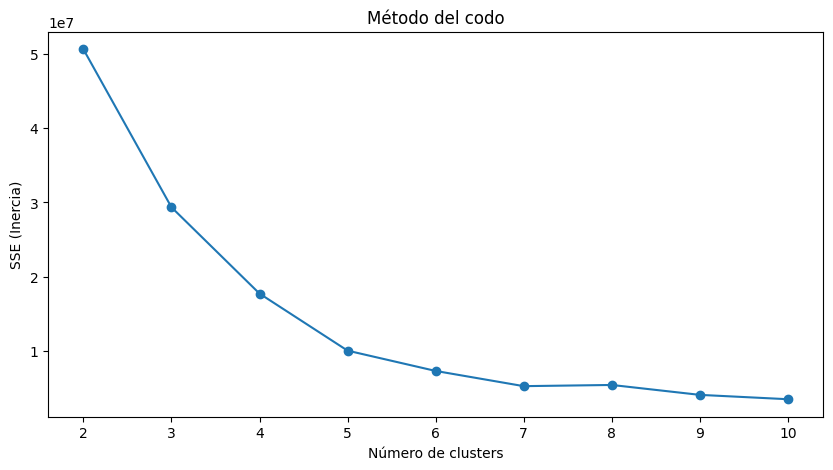

Para un Nº de clusters: 3
- Silueta: 0.6455752364003555
- Calinski-Harabasz: 21588.95114007055
--------------------------------------------------
Para un Nº de clusters: 4
- Silueta: 0.6455606411860842
- Calinski-Harabasz: 26453.382620952194
--------------------------------------------------
Para un Nº de clusters: 5
- Silueta: 0.5642260524681563
- Calinski-Harabasz: 37992.99592907272
--------------------------------------------------
Para un Nº de clusters: 6
- Silueta: 0.5432804692015863
- Calinski-Harabasz: 41894.4882565888
--------------------------------------------------
Para un Nº de clusters: 7
- Silueta: 0.5402143713916702
- Calinski-Harabasz: 49254.951574295614
--------------------------------------------------
Para un Nº de clusters: 8
- Silueta: 0.54839861351157
- Calinski-Harabasz: 50453.90537119475
--------------------------------------------------


In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

def clustering(data_cluster):
    # Método del codo
    Coste = []
    krange = np.arange(2, 11)  # Rango de valores de k a probar
    for num in krange:
        kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
        Coste.append(kmeans.inertia_)

    # Plot del método del codo
    plt.figure(figsize=(10, 5))
    plt.plot(krange, Coste, marker='o')
    plt.title('Método del codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('SSE (Inercia)')
    plt.show()

    # Evaluación con Silueta y Calinski-Harabasz
    for k in [3, 4, 5, 6, 7, 8]:
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=10, max_iter=3000)
        Y_pred = kmeans.fit_predict(data_cluster)
        data_cluster.loc[:, 'id_cluster'] = kmeans.labels_
        silhouette_avg = silhouette_score(data_cluster.drop('id_cluster', axis=1), data_cluster['id_cluster'])
        cal = calinski_harabasz_score(data_cluster.drop('id_cluster', axis=1), data_cluster['id_cluster'])

        print(f'Para un Nº de clusters: {k}')
        print(f'- Silueta: {silhouette_avg}')
        print(f'- Calinski-Harabasz: {cal}')
        print('-' * 50)


# Supongamos que df_clusters es tu DataFrame
# Asegúrate de cargar df_clusters antes de llamar a la función
clustering(df_clusters)


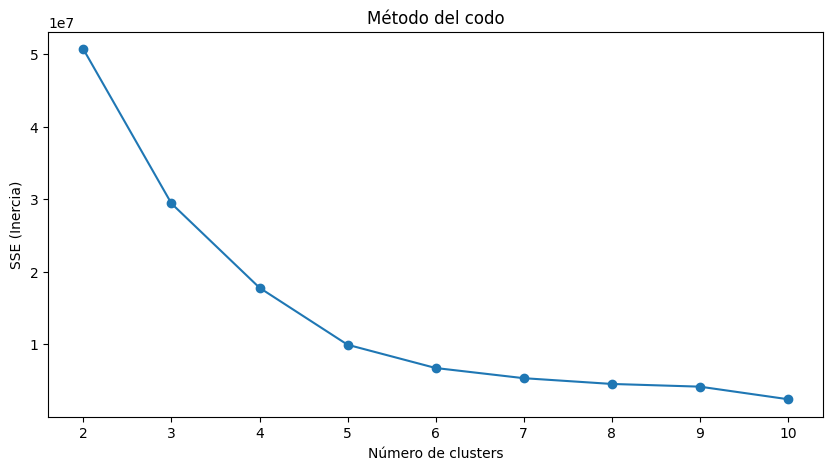

Para un Nº de clusters: 3
- Silueta: 0.6455752364003555
- Calinski-Harabasz: 21588.95114007055
--------------------------------------------------
Para un Nº de clusters: 4
- Silueta: 0.6455606411860842
- Calinski-Harabasz: 26453.382620952194
--------------------------------------------------
Para un Nº de clusters: 5
- Silueta: 0.5642260524681563
- Calinski-Harabasz: 37992.99592907272
--------------------------------------------------
Para un Nº de clusters: 6
- Silueta: 0.5432804692015863
- Calinski-Harabasz: 41894.4882565888
--------------------------------------------------
Para un Nº de clusters: 7
- Silueta: 0.5402143713916702
- Calinski-Harabasz: 49254.951574295614
--------------------------------------------------
Para un Nº de clusters: 8
- Silueta: 0.54839861351157
- Calinski-Harabasz: 50453.90537119475
--------------------------------------------------


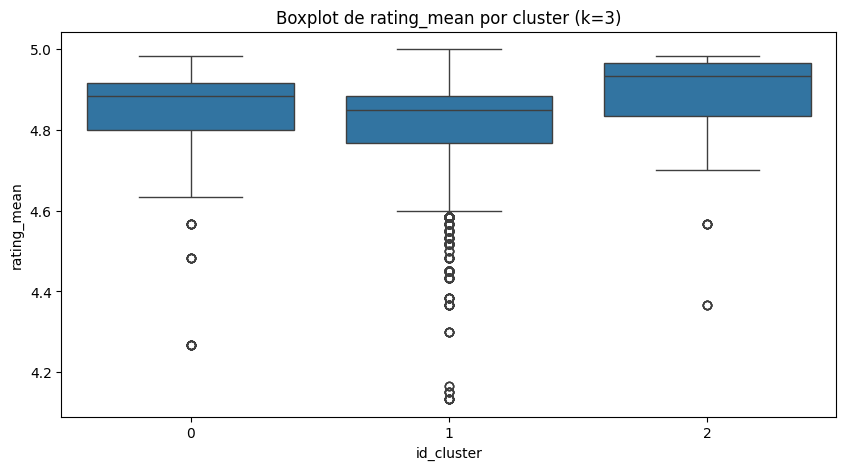

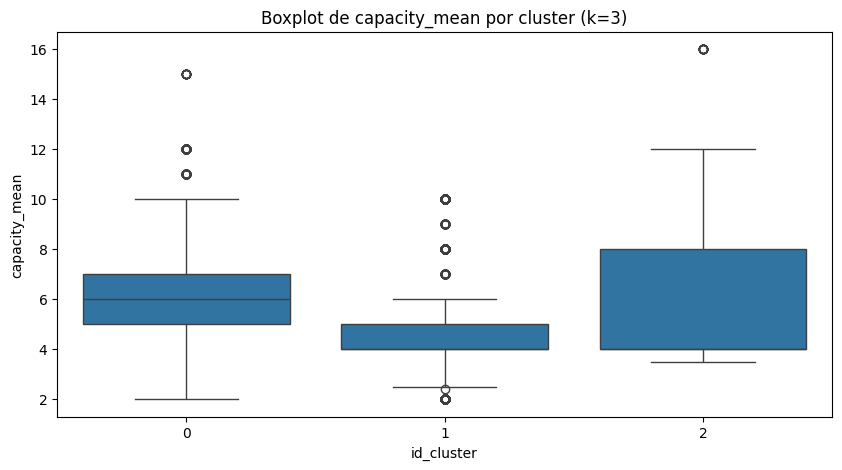

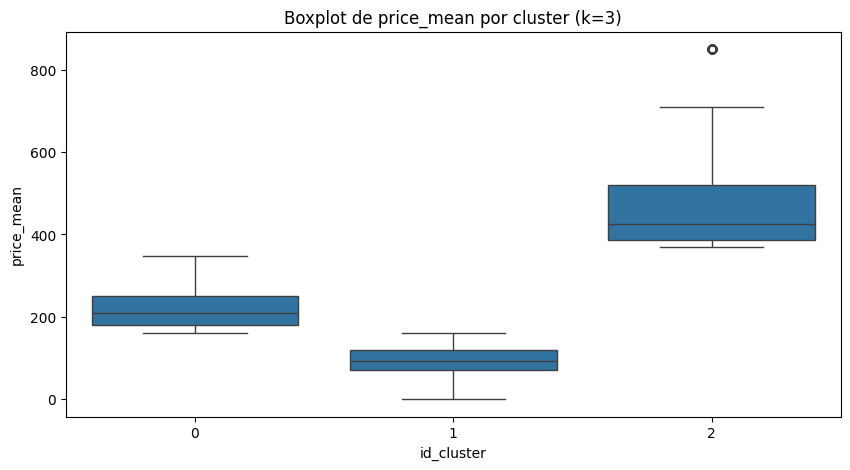

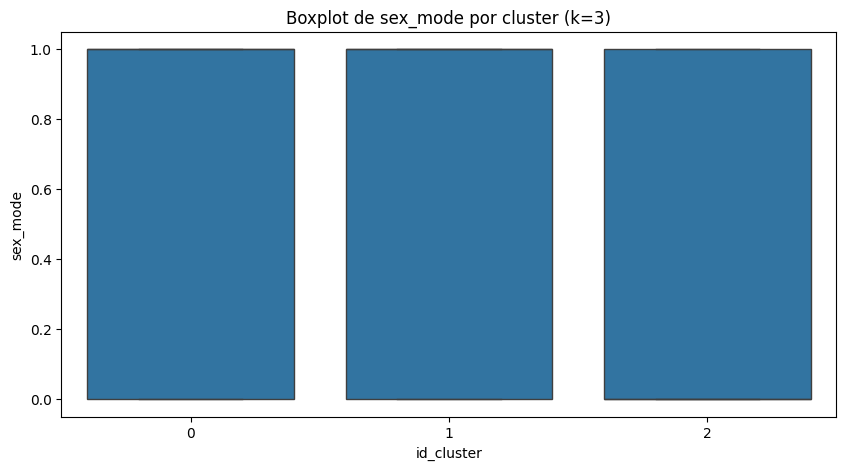

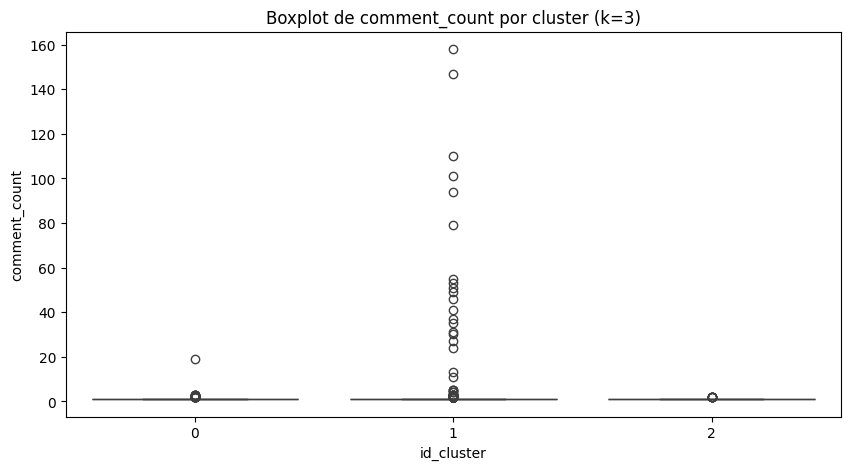

id_cluster
1    9249
0    2206
2     568
Name: count, dtype: int64


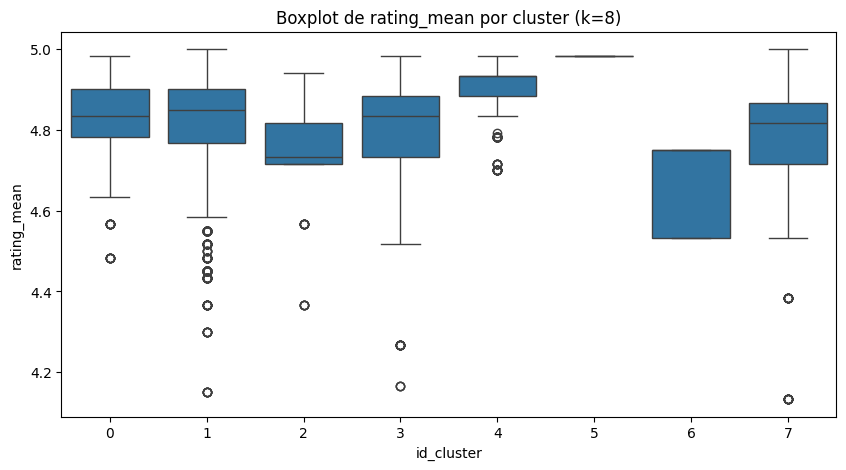

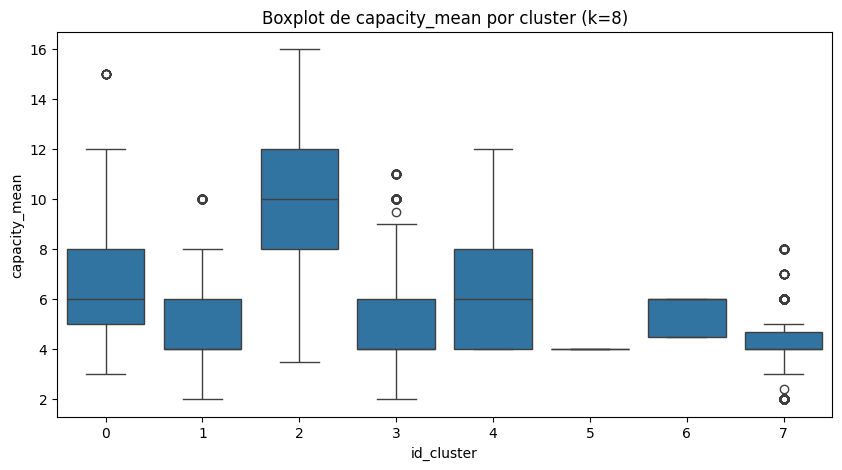

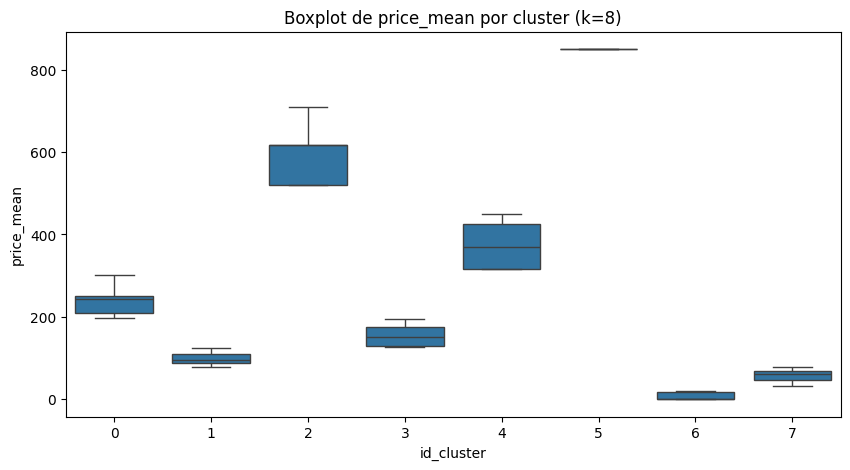

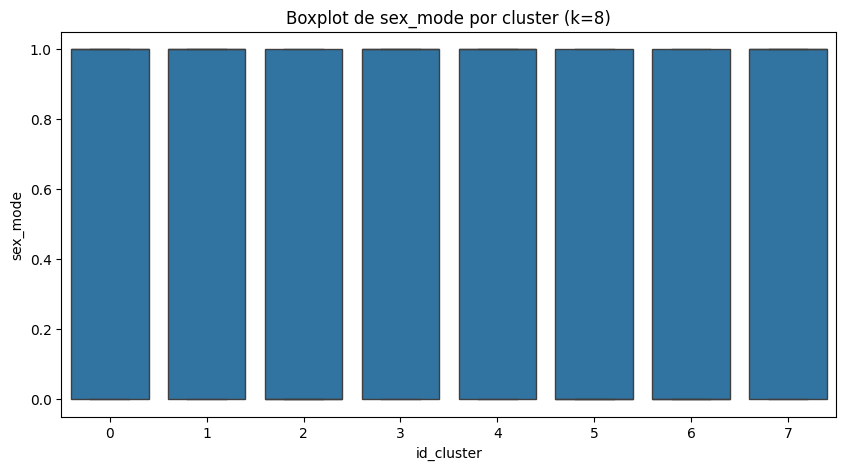

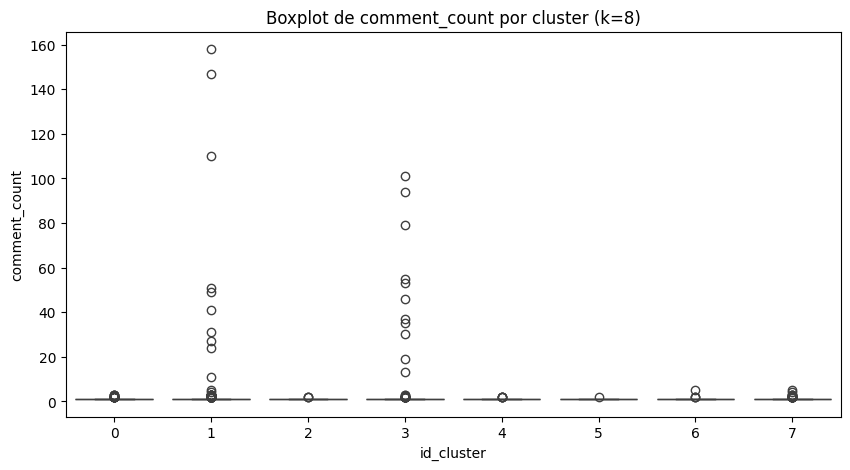

id_cluster
1    4993
3    2594
7    2400
0    1037
4     731
6     110
2      83
5      75
Name: count, dtype: int64


In [66]:
def clustering(data_cluster):

    # Método del codo
    Coste = []
    krange = np.arange(2, 11)  # Rango de valores de k a probar
    for num in krange:
        kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
        Coste.append(kmeans.inertia_)

    # Plot del método del codo
    plt.figure(figsize=(10, 5))
    plt.plot(krange, Coste, marker='o')
    plt.title('Método del codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('SSE (Inercia)')
    plt.show()

    # Evaluación con Silueta y Calinski-Harabasz
    for k in [3, 4, 5, 6, 7, 8]:
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=10, max_iter=3000)
        Y_pred = kmeans.fit_predict(data_cluster)
        data_cluster.loc[:, 'id_cluster'] = kmeans.labels_
        silhouette_avg = silhouette_score(data_cluster.drop('id_cluster', axis=1), data_cluster['id_cluster'])
        cal = calinski_harabasz_score(data_cluster.drop('id_cluster', axis=1), data_cluster['id_cluster'])

        print(f'Para un Nº de clusters: {k}')
        print(f'- Silueta: {silhouette_avg}')
        print(f'- Calinski-Harabasz: {cal}')
        print('-' * 50)

    # Clustering con 3 clusters
    k_val = 3
    kmeans = KMeans(n_clusters=k_val, n_init='auto', random_state=10, max_iter=3000)
    Y_pred = kmeans.fit_predict(data_cluster)
    data_cluster.loc[:, 'id_cluster'] = kmeans.labels_

    for col in data_cluster.columns.drop('id_cluster'):
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=data_cluster, x='id_cluster', y=col)
        plt.title(f'Boxplot de {col} por cluster (k={k_val})')
        plt.show()

    print(data_cluster['id_cluster'].value_counts())

    # Clustering con 8 clusters
    k_val = 8
    kmeans = KMeans(n_clusters=k_val, n_init='auto', random_state=10, max_iter=3000)
    Y_pred = kmeans.fit_predict(data_cluster)
    data_cluster.loc[:, 'id_cluster'] = kmeans.labels_

    for col in data_cluster.columns.drop('id_cluster'):
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=data_cluster, x='id_cluster', y=col)
        plt.title(f'Boxplot de {col} por cluster (k={k_val})')
        plt.show()

    print(data_cluster['id_cluster'].value_counts())

# Supongamos que df_clusters es tu DataFrame
# Asegúrate de cargar df_clusters antes de llamar a la función
clustering(df_clusters)
